## Importing libraries

In [1]:
import pickle
import numpy as np
import pandas as pd
import keras
import os
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

from keras import callbacks
from lime import lime_image
from tensorflow.keras import layers
from tensorflow.keras.models import load_model
from tensorflow.keras import optimizers
from skimage.segmentation import mark_boundaries
from tensorflow.keras.utils import load_img, img_to_array
from tf_explain.core.grad_cam import GradCAM
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, Reshape, GlobalAveragePooling2D, GlobalMaxPooling2D, Multiply, Concatenate

from FunctionReference import Baseline_Model, CBAM_Model, SE_Model

C:\Users\peklu\Desktop\VisualAttentionAsExplanation\notebooks\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Meta parameters

In [3]:
saving_dir = "CustomDatasetLIME\\"
model_dir = "..\\Models\\TrainedModels\\"

## Choose a model

In [4]:
model = load_model(model_dir + "TrainedBaselineModel.keras", compile=True)
#model = load_model(model_dir + "TrainedCbamModel.keras", compile=True)
#model = load_model(model_dir + "TrainedSeModel.keras", compile=True)

C:\Users\peklu\Desktop\VisualAttentionAsExplanation\notebooks\env\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 64 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


## Preparing images

In [5]:
path_a="..\\Datasets\\AdditionalDatasets\\FatimaDataset\\a.jpg"
path_b="..\\Datasets\\AdditionalDatasets\\FatimaDataset\\b.jpg"
path_c="..\\Datasets\\AdditionalDatasets\\FatimaDataset\\c.jpg"
path_d="..\\Datasets\\AdditionalDatasets\\FatimaDataset\\d.jpg"
path_e="..\\Datasets\\AdditionalDatasets\\FatimaDataset\\e.jpg"
path_f="..\\Datasets\\AdditionalDatasets\\FatimaDataset\\f.jpg"
path_g="..\\Datasets\\AdditionalDatasets\\FatimaDataset\\g.jpg"
path_h="..\\Datasets\\AdditionalDatasets\\FatimaDataset\\h.jpg"
path_i="..\\Datasets\\AdditionalDatasets\\FatimaDataset\\i.jpg"
path_j="..\\Datasets\\AdditionalDatasets\\FatimaDataset\\j.jpg"
path_k="..\\Datasets\\AdditionalDatasets\\FatimaDataset\\k.jpg"
path_l="..\\Datasets\\AdditionalDatasets\\FatimaDataset\\l.jpg"
path_m="..\\Datasets\\AdditionalDatasets\\FatimaDataset\\m.jpg"
path_n="..\\Datasets\\AdditionalDatasets\\FatimaDataset\\n.jpg"
path_o="..\\Datasets\\AdditionalDatasets\\FatimaDataset\\o.jpg"
path_p="..\\Datasets\\AdditionalDatasets\\FatimaDataset\\p.jpg"
path_q="..\\Datasets\\AdditionalDatasets\\FatimaDataset\\q.jpg"
path_r="..\\Datasets\\AdditionalDatasets\\FatimaDataset\\r.jpg"
path_s="..\\Datasets\\AdditionalDatasets\\FatimaDataset\\s.jpg"
path_t="..\\Datasets\\AdditionalDatasets\\FatimaDataset\\t.jpg"
path_u="..\\Datasets\\AdditionalDatasets\\FatimaDataset\\u.jpg"
path_v="..\\Datasets\\AdditionalDatasets\\FatimaDataset\\v.jpg"
path_w="..\\Datasets\\AdditionalDatasets\\FatimaDataset\\w.jpg"
path_x="..\\Datasets\\AdditionalDatasets\\FatimaDataset\\x.jpg"
path_y="..\\Datasets\\AdditionalDatasets\\FatimaDataset\\y.jpg"
path_z="..\\Datasets\\AdditionalDatasets\\FatimaDataset\\z.jpg"

In [6]:
# a
image_a = load_img(path_a, target_size=(64, 64))
image_array_a = img_to_array(image_a) / 255.0
image_input_a = np.expand_dims(image_array_a, axis=0)

# b
image_b = load_img(path_b, target_size=(64, 64))
image_array_b = img_to_array(image_b) / 255.0
image_input_b = np.expand_dims(image_array_b, axis=0)

# c
image_c = load_img(path_c, target_size=(64, 64))
image_array_c = img_to_array(image_c) / 255.0
image_input_c = np.expand_dims(image_array_c, axis=0)

# d
image_d = load_img(path_d, target_size=(64, 64))
image_array_d = img_to_array(image_d) / 255.0
image_input_d = np.expand_dims(image_array_d, axis=0)

# e
image_e = load_img(path_e, target_size=(64, 64))
image_array_e = img_to_array(image_e) / 255.0
image_input_e = np.expand_dims(image_array_e, axis=0)

# f
image_f = load_img(path_f, target_size=(64, 64))
image_array_f = img_to_array(image_f) / 255.0
image_input_f = np.expand_dims(image_array_f, axis=0)

# g
image_g = load_img(path_g, target_size=(64, 64))
image_array_g = img_to_array(image_g) / 255.0
image_input_g = np.expand_dims(image_array_g, axis=0)

# h
image_h = load_img(path_h, target_size=(64, 64))
image_array_h = img_to_array(image_h) / 255.0
image_input_h = np.expand_dims(image_array_h, axis=0)

# i
image_i = load_img(path_i, target_size=(64, 64))
image_array_i = img_to_array(image_i) / 255.0
image_input_i = np.expand_dims(image_array_i, axis=0)

# j
image_j = load_img(path_j, target_size=(64, 64))
image_array_j = img_to_array(image_j) / 255.0
image_input_j = np.expand_dims(image_array_j, axis=0)

# k
image_k = load_img(path_k, target_size=(64, 64))
image_array_k = img_to_array(image_k) / 255.0
image_input_k = np.expand_dims(image_array_k, axis=0)

# l
image_l = load_img(path_l, target_size=(64, 64))
image_array_l = img_to_array(image_l) / 255.0
image_input_l = np.expand_dims(image_array_l, axis=0)

# m
image_m = load_img(path_m, target_size=(64, 64))
image_array_m = img_to_array(image_m) / 255.0
image_input_m = np.expand_dims(image_array_m, axis=0)

# n
image_n = load_img(path_n, target_size=(64, 64))
image_array_n = img_to_array(image_n) / 255.0
image_input_n = np.expand_dims(image_array_n, axis=0)

# o
image_o = load_img(path_o, target_size=(64, 64))
image_array_o = img_to_array(image_o) / 255.0
image_input_o = np.expand_dims(image_array_o, axis=0)

# p
image_p = load_img(path_p, target_size=(64, 64))
image_array_p = img_to_array(image_p) / 255.0
image_input_p = np.expand_dims(image_array_p, axis=0)

# q
image_q = load_img(path_q, target_size=(64, 64))
image_array_q = img_to_array(image_q) / 255.0
image_input_q = np.expand_dims(image_array_q, axis=0)

# r
image_r = load_img(path_r, target_size=(64, 64))
image_array_r = img_to_array(image_r) / 255.0
image_input_r = np.expand_dims(image_array_r, axis=0)

# s
image_s = load_img(path_s, target_size=(64, 64))
image_array_s = img_to_array(image_s) / 255.0
image_input_s = np.expand_dims(image_array_s, axis=0)

# t
image_t = load_img(path_t, target_size=(64, 64))
image_array_t = img_to_array(image_t) / 255.0
image_input_t = np.expand_dims(image_array_t, axis=0)

# u
image_u = load_img(path_u, target_size=(64, 64))
image_array_u = img_to_array(image_u) / 255.0
image_input_u = np.expand_dims(image_array_u, axis=0)

# v
image_v = load_img(path_v, target_size=(64, 64))
image_array_v = img_to_array(image_v) / 255.0
image_input_v = np.expand_dims(image_array_v, axis=0)

# w
image_w = load_img(path_w, target_size=(64, 64))
image_array_w = img_to_array(image_w) / 255.0
image_input_w = np.expand_dims(image_array_w, axis=0)

# x
image_x = load_img(path_x, target_size=(64, 64))
image_array_x = img_to_array(image_x) / 255.0
image_input_x = np.expand_dims(image_array_x, axis=0)

# y
image_y = load_img(path_y, target_size=(64, 64))
image_array_y = img_to_array(image_y) / 255.0
image_input_y = np.expand_dims(image_array_y, axis=0)

# z
image_z = load_img(path_z, target_size=(64, 64))
image_array_z = img_to_array(image_z) / 255.0
image_input_z = np.expand_dims(image_array_z, axis=0)

## LIME

In [25]:
def explain_with_lime(image_array, model):
    # Initialize LIME explainer for image data
    explainer = lime_image.LimeImageExplainer()

    # Convert the image to float64 to avoid dtype mismatch
    image_array = image_array.astype(np.float64)

    # Explain the image classification with LIME
    explanation = explainer.explain_instance(image_array, model.predict, top_labels=26, hide_color=0, num_samples=1000)

    # Get image and mask for the top predicted class
    temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=20, hide_rest=True)
    
    fig, ax = plt.subplots()
    ax.imshow(mark_boundaries(temp, mask))
    plt.title("LIME Explanation")
    plt.show()

    heatmap_standarized = mark_boundaries(temp, mask)
    return (heatmap_standarized * 255).astype(np.uint8)

## Explanations

  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


  1%|▊                                                                               | 10/1000 [00:00<00:19, 50.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  2%|█▌                                                                              | 20/1000 [00:00<00:14, 65.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  3%|██▍                                                                             | 30/1000 [00:00<00:13, 73.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  4%|███▏                                                                            | 40/1000 [00:00<00:12, 76.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  5%|████                                                                            | 50/1000 [00:00<00:12, 76.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  6%|████▊                                                                           | 60/1000 [00:00<00:12, 75.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  7%|█████▌                                                                          | 70/1000 [00:00<00:12, 76.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  8%|██████▍                                                                         | 80/1000 [00:01<00:11, 76.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  9%|███████▏                                                                        | 90/1000 [00:01<00:11, 77.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 10%|███████▉                                                                       | 100/1000 [00:01<00:11, 78.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 11%|████████▋                                                                      | 110/1000 [00:01<00:11, 79.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 12%|█████████▍                                                                     | 120/1000 [00:01<00:11, 77.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 13%|██████████▎                                                                    | 130/1000 [00:01<00:11, 76.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 14%|███████████                                                                    | 140/1000 [00:01<00:11, 77.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 15%|███████████▊                                                                   | 150/1000 [00:01<00:10, 78.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 16%|████████████▋                                                                  | 160/1000 [00:02<00:10, 79.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 17%|█████████████▍                                                                 | 170/1000 [00:02<00:10, 81.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 18%|██████████████▏                                                                | 180/1000 [00:02<00:09, 82.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 19%|███████████████                                                                | 190/1000 [00:02<00:09, 82.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 20%|███████████████▊                                                               | 200/1000 [00:02<00:09, 81.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 21%|████████████████▌                                                              | 210/1000 [00:02<00:09, 83.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 22%|█████████████████▍                                                             | 220/1000 [00:02<00:09, 84.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 23%|██████████████████▏                                                            | 230/1000 [00:02<00:09, 85.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 24%|██████████████████▉                                                            | 240/1000 [00:03<00:08, 85.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 25%|███████████████████▊                                                           | 250/1000 [00:03<00:09, 82.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 26%|████████████████████▌                                                          | 260/1000 [00:03<00:09, 80.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 27%|█████████████████████▎                                                         | 270/1000 [00:03<00:09, 76.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 28%|██████████████████████                                                         | 280/1000 [00:03<00:09, 78.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 29%|██████████████████████▉                                                        | 290/1000 [00:03<00:08, 80.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 30%|███████████████████████▋                                                       | 300/1000 [00:03<00:08, 82.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 31%|████████████████████████▍                                                      | 310/1000 [00:03<00:08, 82.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 32%|█████████████████████████▎                                                     | 320/1000 [00:04<00:08, 83.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 33%|██████████████████████████                                                     | 330/1000 [00:04<00:08, 82.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 34%|██████████████████████████▊                                                    | 340/1000 [00:04<00:08, 81.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 35%|███████████████████████████▋                                                   | 350/1000 [00:04<00:08, 78.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 36%|████████████████████████████▍                                                  | 360/1000 [00:04<00:08, 77.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 37%|█████████████████████████████▏                                                 | 370/1000 [00:04<00:08, 77.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 38%|██████████████████████████████                                                 | 380/1000 [00:04<00:07, 79.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 39%|██████████████████████████████▊                                                | 390/1000 [00:04<00:07, 77.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 40%|███████████████████████████████▌                                               | 400/1000 [00:05<00:07, 77.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 41%|████████████████████████████████▍                                              | 410/1000 [00:05<00:07, 77.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 42%|█████████████████████████████████▏                                             | 420/1000 [00:05<00:07, 78.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 43%|█████████████████████████████████▉                                             | 430/1000 [00:05<00:07, 78.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 44%|██████████████████████████████████▊                                            | 440/1000 [00:05<00:07, 79.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 45%|███████████████████████████████████▌                                           | 450/1000 [00:05<00:06, 80.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 46%|████████████████████████████████████▎                                          | 460/1000 [00:05<00:06, 80.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 47%|█████████████████████████████████████▏                                         | 470/1000 [00:05<00:06, 80.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 48%|█████████████████████████████████████▉                                         | 480/1000 [00:06<00:06, 79.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 49%|██████████████████████████████████████▋                                        | 490/1000 [00:06<00:06, 79.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 50%|███████████████████████████████████████▌                                       | 500/1000 [00:06<00:06, 80.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 51%|████████████████████████████████████████▎                                      | 510/1000 [00:06<00:06, 76.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 52%|█████████████████████████████████████████                                      | 520/1000 [00:06<00:06, 78.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 53%|█████████████████████████████████████████▊                                     | 530/1000 [00:06<00:05, 79.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 54%|██████████████████████████████████████████▋                                    | 540/1000 [00:06<00:05, 79.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 55%|███████████████████████████████████████████▍                                   | 550/1000 [00:06<00:05, 81.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 56%|████████████████████████████████████████████▏                                  | 560/1000 [00:07<00:05, 82.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 57%|█████████████████████████████████████████████                                  | 570/1000 [00:07<00:05, 81.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 58%|█████████████████████████████████████████████▊                                 | 580/1000 [00:07<00:05, 76.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 59%|██████████████████████████████████████████████▌                                | 590/1000 [00:07<00:05, 75.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 60%|███████████████████████████████████████████████▍                               | 600/1000 [00:07<00:05, 78.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 61%|████████████████████████████████████████████████▏                              | 610/1000 [00:07<00:04, 80.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 62%|████████████████████████████████████████████████▉                              | 620/1000 [00:07<00:04, 81.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 63%|█████████████████████████████████████████████████▊                             | 630/1000 [00:07<00:04, 81.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 64%|██████████████████████████████████████████████████▌                            | 640/1000 [00:08<00:04, 83.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 65%|███████████████████████████████████████████████████▎                           | 650/1000 [00:08<00:04, 83.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 66%|████████████████████████████████████████████████████▏                          | 660/1000 [00:08<00:04, 83.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 67%|████████████████████████████████████████████████████▉                          | 670/1000 [00:08<00:04, 81.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 68%|█████████████████████████████████████████████████████▋                         | 680/1000 [00:08<00:03, 82.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 69%|██████████████████████████████████████████████████████▌                        | 690/1000 [00:08<00:03, 83.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 70%|███████████████████████████████████████████████████████▎                       | 700/1000 [00:08<00:03, 83.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 71%|████████████████████████████████████████████████████████                       | 710/1000 [00:08<00:03, 82.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 72%|████████████████████████████████████████████████████████▉                      | 720/1000 [00:09<00:03, 82.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 73%|█████████████████████████████████████████████████████████▋                     | 730/1000 [00:09<00:03, 82.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 74%|██████████████████████████████████████████████████████████▍                    | 740/1000 [00:09<00:03, 82.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 75%|███████████████████████████████████████████████████████████▎                   | 750/1000 [00:09<00:03, 82.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 76%|████████████████████████████████████████████████████████████                   | 760/1000 [00:09<00:02, 81.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 77%|████████████████████████████████████████████████████████████▊                  | 770/1000 [00:09<00:02, 81.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 78%|█████████████████████████████████████████████████████████████▌                 | 780/1000 [00:09<00:02, 82.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 79%|██████████████████████████████████████████████████████████████▍                | 790/1000 [00:09<00:02, 82.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 80%|███████████████████████████████████████████████████████████████▏               | 800/1000 [00:10<00:02, 81.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 81%|███████████████████████████████████████████████████████████████▉               | 810/1000 [00:10<00:02, 82.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 82%|████████████████████████████████████████████████████████████████▊              | 820/1000 [00:10<00:02, 82.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 83%|█████████████████████████████████████████████████████████████████▌             | 830/1000 [00:10<00:02, 81.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 84%|██████████████████████████████████████████████████████████████████▎            | 840/1000 [00:10<00:01, 80.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 85%|███████████████████████████████████████████████████████████████████▏           | 850/1000 [00:10<00:01, 80.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 86%|███████████████████████████████████████████████████████████████████▉           | 860/1000 [00:10<00:01, 81.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 87%|████████████████████████████████████████████████████████████████████▋          | 870/1000 [00:10<00:01, 81.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 88%|█████████████████████████████████████████████████████████████████████▌         | 880/1000 [00:10<00:01, 81.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 89%|██████████████████████████████████████████████████████████████████████▎        | 890/1000 [00:11<00:01, 80.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 90%|███████████████████████████████████████████████████████████████████████        | 900/1000 [00:11<00:01, 80.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 91%|███████████████████████████████████████████████████████████████████████▉       | 910/1000 [00:11<00:01, 77.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 92%|████████████████████████████████████████████████████████████████████████▋      | 920/1000 [00:11<00:01, 76.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 93%|█████████████████████████████████████████████████████████████████████████▍     | 930/1000 [00:11<00:00, 76.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 94%|██████████████████████████████████████████████████████████████████████████▎    | 940/1000 [00:11<00:00, 78.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 95%|███████████████████████████████████████████████████████████████████████████    | 950/1000 [00:11<00:00, 79.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 96%|███████████████████████████████████████████████████████████████████████████▊   | 960/1000 [00:12<00:00, 80.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 97%|████████████████████████████████████████████████████████████████████████████▋  | 970/1000 [00:12<00:00, 81.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 98%|█████████████████████████████████████████████████████████████████████████████▍ | 980/1000 [00:12<00:00, 81.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 99%|██████████████████████████████████████████████████████████████████████████████▏| 990/1000 [00:12<00:00, 81.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 79.95it/s]


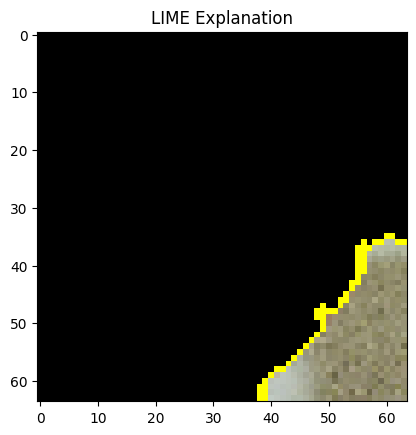

True

In [26]:
# Apply LIME for letter 'a'
image_array = img_to_array(image_a) / 255.0
image = explain_with_lime(image_array, model)
cv2.imwrite(saving_dir + "image_a.jpg", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  1%|▊                                                                               | 10/1000 [00:00<00:11, 84.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  2%|█▌                                                                              | 20/1000 [00:00<00:11, 84.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  3%|██▍                                                                             | 30/1000 [00:00<00:11, 83.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  4%|███▏                                                                            | 40/1000 [00:00<00:11, 81.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  5%|████                                                                            | 50/1000 [00:00<00:11, 80.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  6%|████▊                                                                           | 60/1000 [00:00<00:11, 82.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  7%|█████▌                                                                          | 70/1000 [00:00<00:11, 82.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  8%|██████▍                                                                         | 80/1000 [00:00<00:10, 83.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  9%|███████▏                                                                        | 90/1000 [00:01<00:11, 81.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 10%|███████▉                                                                       | 100/1000 [00:01<00:10, 82.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 11%|████████▋                                                                      | 110/1000 [00:01<00:10, 82.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 12%|█████████▍                                                                     | 120/1000 [00:01<00:10, 81.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 13%|██████████▎                                                                    | 130/1000 [00:01<00:14, 61.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 14%|███████████                                                                    | 140/1000 [00:01<00:12, 66.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 15%|███████████▊                                                                   | 150/1000 [00:01<00:12, 70.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 16%|████████████▋                                                                  | 160/1000 [00:02<00:11, 74.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 17%|█████████████▍                                                                 | 170/1000 [00:02<00:10, 78.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 18%|██████████████▏                                                                | 180/1000 [00:02<00:10, 80.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 19%|███████████████                                                                | 190/1000 [00:02<00:09, 82.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 20%|███████████████▊                                                               | 200/1000 [00:02<00:09, 84.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 21%|████████████████▌                                                              | 210/1000 [00:02<00:09, 83.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 22%|█████████████████▍                                                             | 220/1000 [00:02<00:09, 82.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 23%|██████████████████▏                                                            | 230/1000 [00:02<00:09, 83.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 24%|██████████████████▉                                                            | 240/1000 [00:03<00:08, 85.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 25%|███████████████████▊                                                           | 250/1000 [00:03<00:08, 86.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 26%|████████████████████▌                                                          | 260/1000 [00:03<00:08, 85.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 27%|█████████████████████▎                                                         | 270/1000 [00:03<00:08, 86.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 28%|██████████████████████                                                         | 280/1000 [00:03<00:08, 87.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 29%|██████████████████████▉                                                        | 290/1000 [00:03<00:08, 87.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 30%|███████████████████████▋                                                       | 300/1000 [00:03<00:08, 85.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 31%|████████████████████████▍                                                      | 310/1000 [00:03<00:08, 82.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 32%|█████████████████████████▎                                                     | 320/1000 [00:03<00:08, 84.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 33%|██████████████████████████                                                     | 330/1000 [00:04<00:08, 83.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 34%|██████████████████████████▊                                                    | 340/1000 [00:04<00:07, 82.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 35%|███████████████████████████▋                                                   | 350/1000 [00:04<00:08, 79.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 36%|████████████████████████████▍                                                  | 360/1000 [00:04<00:07, 80.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 37%|█████████████████████████████▏                                                 | 370/1000 [00:04<00:07, 79.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 38%|██████████████████████████████                                                 | 380/1000 [00:04<00:07, 79.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 39%|██████████████████████████████▊                                                | 390/1000 [00:04<00:07, 81.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 40%|███████████████████████████████▌                                               | 400/1000 [00:04<00:07, 83.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 41%|████████████████████████████████▍                                              | 410/1000 [00:05<00:06, 84.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 42%|█████████████████████████████████▏                                             | 420/1000 [00:05<00:06, 84.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 43%|█████████████████████████████████▉                                             | 430/1000 [00:05<00:06, 84.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 44%|██████████████████████████████████▊                                            | 440/1000 [00:05<00:06, 83.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 45%|███████████████████████████████████▌                                           | 450/1000 [00:05<00:06, 84.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 46%|████████████████████████████████████▎                                          | 460/1000 [00:05<00:06, 82.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 47%|█████████████████████████████████████▏                                         | 470/1000 [00:05<00:06, 83.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 48%|█████████████████████████████████████▉                                         | 480/1000 [00:05<00:06, 83.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 49%|██████████████████████████████████████▋                                        | 490/1000 [00:06<00:06, 83.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 50%|███████████████████████████████████████▌                                       | 500/1000 [00:06<00:06, 81.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 51%|████████████████████████████████████████▎                                      | 510/1000 [00:06<00:05, 82.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 52%|█████████████████████████████████████████                                      | 520/1000 [00:06<00:05, 83.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 53%|█████████████████████████████████████████▊                                     | 530/1000 [00:06<00:05, 83.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 54%|██████████████████████████████████████████▋                                    | 540/1000 [00:06<00:05, 81.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 55%|███████████████████████████████████████████▍                                   | 550/1000 [00:06<00:05, 82.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 56%|████████████████████████████████████████████▏                                  | 560/1000 [00:06<00:05, 83.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 57%|█████████████████████████████████████████████                                  | 570/1000 [00:06<00:05, 84.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 58%|█████████████████████████████████████████████▊                                 | 580/1000 [00:07<00:04, 85.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 59%|██████████████████████████████████████████████▌                                | 590/1000 [00:07<00:04, 85.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 60%|███████████████████████████████████████████████▍                               | 600/1000 [00:07<00:04, 85.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 61%|████████████████████████████████████████████████▏                              | 610/1000 [00:07<00:04, 85.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 62%|████████████████████████████████████████████████▉                              | 620/1000 [00:07<00:04, 84.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 63%|█████████████████████████████████████████████████▊                             | 630/1000 [00:07<00:04, 82.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 64%|██████████████████████████████████████████████████▌                            | 640/1000 [00:07<00:04, 83.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 65%|███████████████████████████████████████████████████▎                           | 650/1000 [00:07<00:04, 83.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 66%|████████████████████████████████████████████████████▏                          | 660/1000 [00:08<00:04, 82.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 67%|████████████████████████████████████████████████████▉                          | 670/1000 [00:08<00:04, 82.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 68%|█████████████████████████████████████████████████████▋                         | 680/1000 [00:08<00:03, 83.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 69%|██████████████████████████████████████████████████████▌                        | 690/1000 [00:08<00:03, 82.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 70%|███████████████████████████████████████████████████████▎                       | 700/1000 [00:08<00:03, 82.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 71%|████████████████████████████████████████████████████████                       | 710/1000 [00:08<00:03, 83.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 72%|████████████████████████████████████████████████████████▉                      | 720/1000 [00:08<00:03, 83.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 73%|█████████████████████████████████████████████████████████▋                     | 730/1000 [00:08<00:03, 84.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 74%|██████████████████████████████████████████████████████████▍                    | 740/1000 [00:08<00:03, 83.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 75%|███████████████████████████████████████████████████████████▎                   | 750/1000 [00:09<00:02, 83.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 76%|████████████████████████████████████████████████████████████                   | 760/1000 [00:09<00:02, 84.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 77%|████████████████████████████████████████████████████████████▊                  | 770/1000 [00:09<00:02, 84.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 78%|█████████████████████████████████████████████████████████████▌                 | 780/1000 [00:09<00:02, 85.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 79%|██████████████████████████████████████████████████████████████▍                | 790/1000 [00:09<00:02, 85.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 80%|███████████████████████████████████████████████████████████████▏               | 800/1000 [00:09<00:02, 83.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 81%|███████████████████████████████████████████████████████████████▉               | 810/1000 [00:09<00:02, 82.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 82%|████████████████████████████████████████████████████████████████▊              | 820/1000 [00:09<00:02, 83.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 83%|█████████████████████████████████████████████████████████████████▌             | 830/1000 [00:10<00:02, 84.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 84%|██████████████████████████████████████████████████████████████████▎            | 840/1000 [00:10<00:01, 84.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 85%|███████████████████████████████████████████████████████████████████▏           | 850/1000 [00:10<00:01, 83.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 86%|███████████████████████████████████████████████████████████████████▉           | 860/1000 [00:10<00:01, 80.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 87%|████████████████████████████████████████████████████████████████████▋          | 870/1000 [00:10<00:01, 81.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 88%|█████████████████████████████████████████████████████████████████████▌         | 880/1000 [00:10<00:01, 80.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 89%|██████████████████████████████████████████████████████████████████████▎        | 890/1000 [00:10<00:01, 79.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 90%|███████████████████████████████████████████████████████████████████████        | 900/1000 [00:10<00:01, 80.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 91%|███████████████████████████████████████████████████████████████████████▉       | 910/1000 [00:11<00:01, 82.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 92%|████████████████████████████████████████████████████████████████████████▋      | 920/1000 [00:11<00:00, 82.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 93%|█████████████████████████████████████████████████████████████████████████▍     | 930/1000 [00:11<00:00, 82.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 94%|██████████████████████████████████████████████████████████████████████████▎    | 940/1000 [00:11<00:00, 80.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 95%|███████████████████████████████████████████████████████████████████████████    | 950/1000 [00:11<00:00, 80.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 96%|███████████████████████████████████████████████████████████████████████████▊   | 960/1000 [00:11<00:00, 81.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 97%|████████████████████████████████████████████████████████████████████████████▋  | 970/1000 [00:11<00:00, 82.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 98%|█████████████████████████████████████████████████████████████████████████████▍ | 980/1000 [00:11<00:00, 81.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 99%|██████████████████████████████████████████████████████████████████████████████▏| 990/1000 [00:12<00:00, 81.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 82.28it/s]


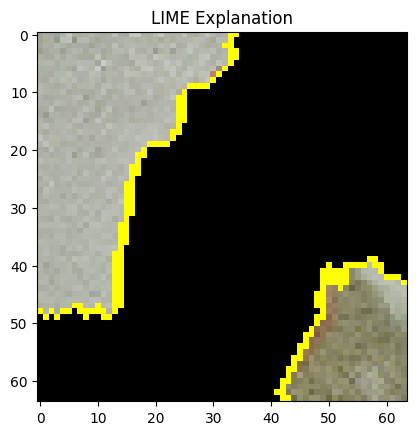

True

In [9]:
# Apply LIME for letter 'b'
image_array = img_to_array(image_b) / 255.0
image = explain_with_lime(image_array, model)
cv2.imwrite(saving_dir + "image_b.jpg", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  1%|▊                                                                               | 10/1000 [00:00<00:11, 82.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  2%|█▌                                                                              | 20/1000 [00:00<00:11, 84.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  3%|██▍                                                                             | 30/1000 [00:00<00:11, 86.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  4%|███▏                                                                            | 40/1000 [00:00<00:11, 87.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  5%|████                                                                            | 50/1000 [00:00<00:10, 86.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  6%|████▊                                                                           | 60/1000 [00:00<00:10, 86.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  7%|█████▌                                                                          | 70/1000 [00:00<00:10, 87.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  8%|██████▍                                                                         | 80/1000 [00:00<00:10, 87.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  9%|███████▏                                                                        | 90/1000 [00:01<00:10, 87.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 10%|███████▉                                                                       | 100/1000 [00:01<00:10, 87.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 11%|████████▋                                                                      | 110/1000 [00:01<00:10, 87.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 12%|█████████▍                                                                     | 120/1000 [00:01<00:10, 86.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 13%|██████████▎                                                                    | 130/1000 [00:01<00:10, 85.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 14%|███████████                                                                    | 140/1000 [00:01<00:09, 86.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 15%|███████████▊                                                                   | 150/1000 [00:01<00:09, 86.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 16%|████████████▋                                                                  | 160/1000 [00:01<00:09, 86.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 17%|█████████████▍                                                                 | 170/1000 [00:01<00:09, 87.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 18%|██████████████▏                                                                | 180/1000 [00:02<00:09, 87.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 19%|███████████████                                                                | 190/1000 [00:02<00:09, 87.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 20%|███████████████▊                                                               | 200/1000 [00:02<00:09, 87.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 21%|████████████████▌                                                              | 210/1000 [00:02<00:09, 87.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 22%|█████████████████▍                                                             | 220/1000 [00:02<00:08, 87.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 23%|██████████████████▏                                                            | 230/1000 [00:02<00:08, 86.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 24%|██████████████████▉                                                            | 240/1000 [00:02<00:08, 87.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 25%|███████████████████▊                                                           | 250/1000 [00:02<00:09, 81.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 26%|████████████████████▌                                                          | 260/1000 [00:03<00:08, 83.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 27%|█████████████████████▎                                                         | 270/1000 [00:03<00:08, 85.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 28%|██████████████████████                                                         | 280/1000 [00:03<00:08, 85.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 29%|██████████████████████▉                                                        | 290/1000 [00:03<00:08, 83.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 30%|███████████████████████▋                                                       | 300/1000 [00:03<00:08, 84.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 31%|████████████████████████▍                                                      | 310/1000 [00:03<00:08, 81.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 32%|█████████████████████████▎                                                     | 320/1000 [00:03<00:08, 82.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 33%|██████████████████████████                                                     | 330/1000 [00:03<00:08, 82.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 34%|██████████████████████████▊                                                    | 340/1000 [00:03<00:08, 81.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 35%|███████████████████████████▋                                                   | 350/1000 [00:04<00:08, 80.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 36%|████████████████████████████▍                                                  | 360/1000 [00:04<00:07, 80.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 37%|█████████████████████████████▏                                                 | 370/1000 [00:04<00:07, 82.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 38%|██████████████████████████████                                                 | 380/1000 [00:04<00:07, 82.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 39%|██████████████████████████████▊                                                | 390/1000 [00:04<00:07, 83.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 40%|███████████████████████████████▌                                               | 400/1000 [00:04<00:07, 85.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 41%|████████████████████████████████▍                                              | 410/1000 [00:04<00:06, 86.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 42%|█████████████████████████████████▏                                             | 420/1000 [00:04<00:06, 86.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 43%|█████████████████████████████████▉                                             | 430/1000 [00:05<00:06, 86.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 44%|██████████████████████████████████▊                                            | 440/1000 [00:05<00:06, 87.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 45%|███████████████████████████████████▌                                           | 450/1000 [00:05<00:06, 87.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 46%|████████████████████████████████████▎                                          | 460/1000 [00:05<00:06, 87.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 47%|█████████████████████████████████████▏                                         | 470/1000 [00:05<00:06, 87.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 48%|█████████████████████████████████████▉                                         | 480/1000 [00:05<00:05, 87.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 49%|██████████████████████████████████████▋                                        | 490/1000 [00:05<00:05, 86.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 50%|███████████████████████████████████████▌                                       | 500/1000 [00:05<00:05, 87.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 51%|████████████████████████████████████████▎                                      | 510/1000 [00:05<00:05, 87.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 52%|█████████████████████████████████████████                                      | 520/1000 [00:06<00:05, 87.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 53%|█████████████████████████████████████████▊                                     | 530/1000 [00:06<00:05, 84.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 54%|██████████████████████████████████████████▋                                    | 540/1000 [00:06<00:05, 84.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 55%|███████████████████████████████████████████▍                                   | 550/1000 [00:06<00:05, 85.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 56%|████████████████████████████████████████████▏                                  | 560/1000 [00:06<00:05, 86.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 57%|█████████████████████████████████████████████                                  | 570/1000 [00:06<00:04, 86.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 58%|█████████████████████████████████████████████▊                                 | 580/1000 [00:06<00:04, 87.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 59%|██████████████████████████████████████████████▌                                | 590/1000 [00:06<00:04, 87.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 60%|███████████████████████████████████████████████▍                               | 600/1000 [00:06<00:04, 87.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 61%|████████████████████████████████████████████████▏                              | 610/1000 [00:07<00:04, 87.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 62%|████████████████████████████████████████████████▉                              | 620/1000 [00:07<00:04, 87.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 63%|█████████████████████████████████████████████████▊                             | 630/1000 [00:07<00:04, 87.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 64%|██████████████████████████████████████████████████▌                            | 640/1000 [00:07<00:04, 87.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 65%|███████████████████████████████████████████████████▎                           | 650/1000 [00:07<00:04, 87.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 66%|████████████████████████████████████████████████████▏                          | 660/1000 [00:07<00:03, 88.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 67%|████████████████████████████████████████████████████▉                          | 670/1000 [00:07<00:03, 87.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 68%|█████████████████████████████████████████████████████▋                         | 680/1000 [00:07<00:03, 82.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 69%|██████████████████████████████████████████████████████▌                        | 690/1000 [00:08<00:03, 81.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 70%|███████████████████████████████████████████████████████▎                       | 700/1000 [00:08<00:03, 80.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 71%|████████████████████████████████████████████████████████                       | 710/1000 [00:08<00:03, 83.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 72%|████████████████████████████████████████████████████████▉                      | 720/1000 [00:08<00:03, 84.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 73%|█████████████████████████████████████████████████████████▋                     | 730/1000 [00:08<00:03, 84.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 74%|██████████████████████████████████████████████████████████▍                    | 740/1000 [00:08<00:03, 85.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 75%|███████████████████████████████████████████████████████████▎                   | 750/1000 [00:08<00:02, 86.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 76%|████████████████████████████████████████████████████████████                   | 760/1000 [00:08<00:02, 84.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 77%|████████████████████████████████████████████████████████████▊                  | 770/1000 [00:08<00:02, 85.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 78%|█████████████████████████████████████████████████████████████▌                 | 780/1000 [00:09<00:02, 85.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 79%|██████████████████████████████████████████████████████████████▍                | 790/1000 [00:09<00:02, 85.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 80%|███████████████████████████████████████████████████████████████▏               | 800/1000 [00:09<00:02, 85.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 81%|███████████████████████████████████████████████████████████████▉               | 810/1000 [00:09<00:02, 85.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 82%|████████████████████████████████████████████████████████████████▊              | 820/1000 [00:09<00:02, 86.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 83%|█████████████████████████████████████████████████████████████████▌             | 830/1000 [00:09<00:01, 85.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 84%|██████████████████████████████████████████████████████████████████▎            | 840/1000 [00:09<00:01, 85.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 85%|███████████████████████████████████████████████████████████████████▏           | 850/1000 [00:09<00:01, 85.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 86%|███████████████████████████████████████████████████████████████████▉           | 860/1000 [00:10<00:01, 85.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 87%|████████████████████████████████████████████████████████████████████▋          | 870/1000 [00:10<00:01, 85.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 88%|█████████████████████████████████████████████████████████████████████▌         | 880/1000 [00:10<00:01, 86.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 89%|██████████████████████████████████████████████████████████████████████▎        | 890/1000 [00:10<00:01, 85.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 90%|███████████████████████████████████████████████████████████████████████        | 900/1000 [00:10<00:01, 85.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 91%|███████████████████████████████████████████████████████████████████████▉       | 910/1000 [00:10<00:01, 85.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 92%|████████████████████████████████████████████████████████████████████████▋      | 920/1000 [00:10<00:00, 85.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 93%|█████████████████████████████████████████████████████████████████████████▍     | 930/1000 [00:10<00:00, 85.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 94%|██████████████████████████████████████████████████████████████████████████▎    | 940/1000 [00:10<00:00, 85.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 95%|███████████████████████████████████████████████████████████████████████████    | 950/1000 [00:11<00:00, 85.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 96%|███████████████████████████████████████████████████████████████████████████▊   | 960/1000 [00:11<00:00, 85.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 97%|████████████████████████████████████████████████████████████████████████████▋  | 970/1000 [00:11<00:00, 85.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 98%|█████████████████████████████████████████████████████████████████████████████▍ | 980/1000 [00:11<00:00, 83.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 99%|██████████████████████████████████████████████████████████████████████████████▏| 990/1000 [00:11<00:00, 82.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 85.51it/s]


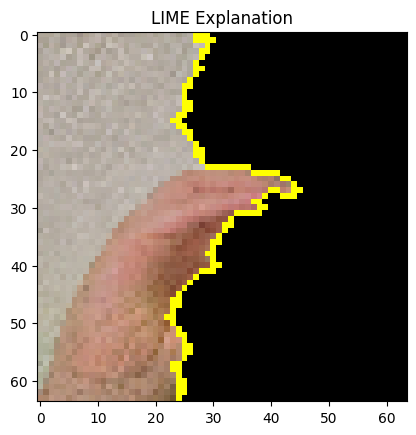

True

In [14]:
# Apply LIME for letter 'c'
image_array = img_to_array(image_c) / 255.0
image = explain_with_lime(image_array, model)
cv2.imwrite(saving_dir + "image_c.jpg", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
# Apply LIME for letter 'd'
image_array = img_to_array(image_d) / 255.0
image = explain_with_lime(image_array, model)
cv2.imwrite(saving_dir + "image_d.jpg", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
# Apply LIME for letter 'e'
image_array = img_to_array(image_e) / 255.0
image = explain_with_lime(image_array, model)
cv2.imwrite(saving_dir + "image_e.jpg", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
# Apply LIME for letter 'f'
image_array = img_to_array(image_f) / 255.0
image = explain_with_lime(image_array, model)
cv2.imwrite(saving_dir + "image_f.jpg", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
# Apply LIME for letter 'g'
image_array = img_to_array(image_g) / 255.0
image = explain_with_lime(image_array, model)
cv2.imwrite(saving_dir + "image_g.jpg", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
# Apply LIME for letter 'h'
image_array = img_to_array(image_h) / 255.0
image = explain_with_lime(image_array, model)
cv2.imwrite(saving_dir + "image_h.jpg", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
# Apply LIME for letter 'i'
image_array = img_to_array(image_i) / 255.0
image = explain_with_lime(image_array, model)
cv2.imwrite(saving_dir + "image_i.jpg", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
# Apply LIME for letter 'j'
image_array = img_to_array(image_j) / 255.0
image = explain_with_lime(image_array, model)
cv2.imwrite(saving_dir + "image_j.jpg", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
# Apply LIME for letter 'k'
image_array = img_to_array(image_k) / 255.0
image = explain_with_lime(image_array, model)
cv2.imwrite(saving_dir + "image_k.jpg", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
# Apply LIME for letter 'l'
image_array = img_to_array(image_l) / 255.0
image = explain_with_lime(image_array, model)
cv2.imwrite(saving_dir + "image_l.jpg", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
# Apply LIME for letter 'm'
image_array = img_to_array(image_m) / 255.0
image = explain_with_lime(image_array, model)
cv2.imwrite(saving_dir + "image_m.jpg", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
# Apply LIME for letter 'n'
image_array = img_to_array(image_n) / 255.0
image = explain_with_lime(image_array, model)
cv2.imwrite(saving_dir + "image_n.jpg", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
# Apply LIME for letter 'o'
image_array = img_to_array(image_o) / 255.0
image = explain_with_lime(image_array, model)
cv2.imwrite(saving_dir + "image_o.jpg", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
# Apply LIME for letter 'p'
image_array = img_to_array(image_p) / 255.0
image = explain_with_lime(image_array, model)
cv2.imwrite(saving_dir + "image_p.jpg", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
# Apply LIME for letter 'q'
image_array = img_to_array(image_q) / 255.0
image = explain_with_lime(image_array, model)
cv2.imwrite(saving_dir + "image_q.jpg", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
# Apply LIME for letter 'r'
image_array = img_to_array(image_r) / 255.0
image = explain_with_lime(image_array, model)
cv2.imwrite(saving_dir + "image_r.jpg", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
# Apply LIME for letter 's'
image_array = img_to_array(image_s) / 255.0
image = explain_with_lime(image_array, model)
cv2.imwrite(saving_dir + "image_s.jpg", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
# Apply LIME for letter 't'
image_array = img_to_array(image_t) / 255.0
image = explain_with_lime(image_array, model)
cv2.imwrite(saving_dir + "image_t.jpg", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
# Apply LIME for letter 'u'
image_array = img_to_array(image_u) / 255.0
image = explain_with_lime(image_array, model)
cv2.imwrite(saving_dir + "image_u.jpg", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
# Apply LIME for letter 'v'
image_array = img_to_array(image_v) / 255.0
image = explain_with_lime(image_array, model)
cv2.imwrite(saving_dir + "image_v.jpg", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
# Apply LIME for letter 'w'
image_array = img_to_array(image_w) / 255.0
image = explain_with_lime(image_array, model)
cv2.imwrite(saving_dir + "image_w.jpg", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
# Apply LIME for letter 'x'
image_array = img_to_array(image_x) / 255.0
image = explain_with_lime(image_array, model)
cv2.imwrite(saving_dir + "image_x.jpg", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
# Apply LIME for letter 'y'
image_array = img_to_array(image_y) / 255.0
image = explain_with_lime(image_array, model)
cv2.imwrite(saving_dir + "image_y.jpg", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
# Apply LIME for letter 'z'
image_array = img_to_array(image_z) / 255.0
image = explain_with_lime(image_array, model)
cv2.imwrite(saving_dir + "image_z.jpg", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))